In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans 

### 1. Get the Data

In [2]:
data = pd.read_csv('CC GENERAL.csv')

### 2. Data discovery

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


 The colume CUST_ID not useful

In [4]:
data = data.drop('CUST_ID',axis=1)

In [5]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Data visualization

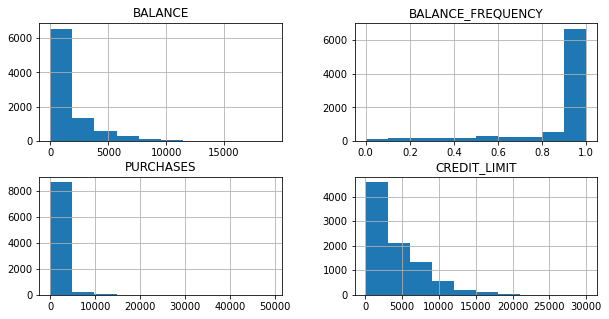

In [8]:
data.hist(['BALANCE','BALANCE_FREQUENCY','PURCHASES','CREDIT_LIMIT'],figsize=(10,5))
# housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
corr_matrix = data.corr()
corr_matrix["BALANCE"].sort_values(ascending=False)

BALANCE                             1.000000
CREDIT_LIMIT                        0.531283
CASH_ADVANCE                        0.496692
CASH_ADVANCE_FREQUENCY              0.449218
MINIMUM_PAYMENTS                    0.398684
CASH_ADVANCE_TRX                    0.385152
PAYMENTS                            0.322802
BALANCE_FREQUENCY                   0.322412
PURCHASES                           0.181261
ONEOFF_PURCHASES                    0.164350
PURCHASES_TRX                       0.154338
INSTALLMENTS_PURCHASES              0.126469
ONEOFF_PURCHASES_FREQUENCY          0.073166
TENURE                              0.072692
PURCHASES_INSTALLMENTS_FREQUENCY   -0.063186
PURCHASES_FREQUENCY                -0.077944
PRC_FULL_PAYMENT                   -0.318959
Name: BALANCE, dtype: float64

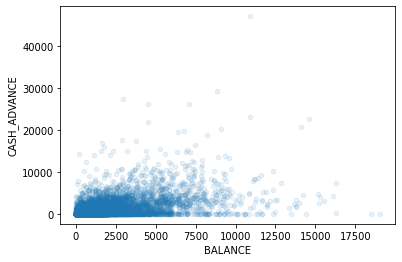

In [46]:
data.plot(kind='scatter',x='BALANCE' ,y='CASH_ADVANCE',alpha=0.1)
plt.show()

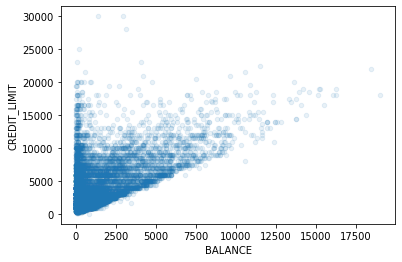

In [10]:
data.plot(kind='scatter',x='BALANCE' ,y='CREDIT_LIMIT',alpha=0.1)
plt.show()

Text(0.5, 1.0, 'correlations among the features')

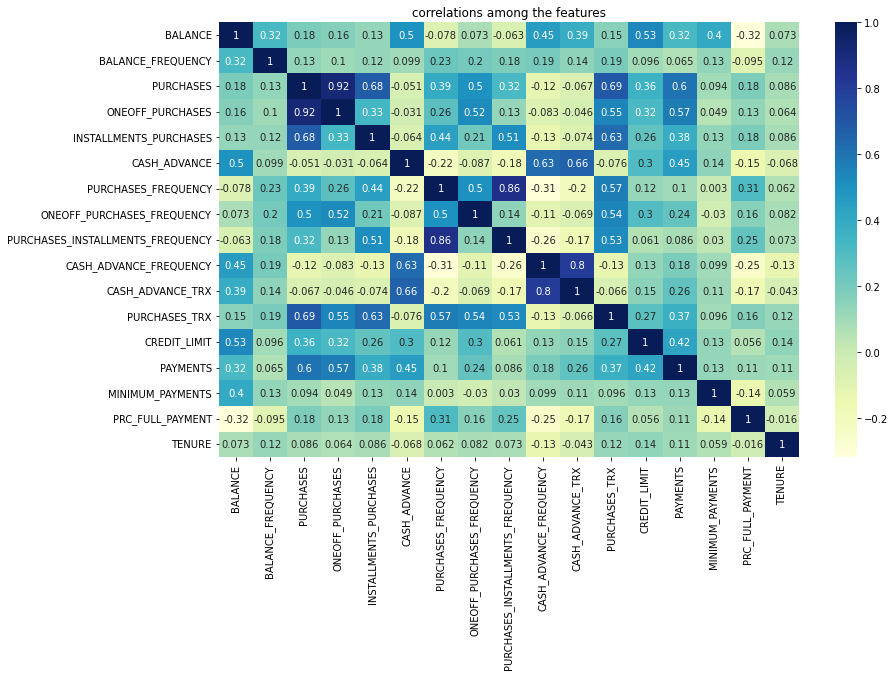

In [11]:
plt.figure(figsize = (13,8))
sns.heatmap(data.corr(), annot=True,cmap='YlGnBu')
plt.title('correlations among the features')

<AxesSubplot:>

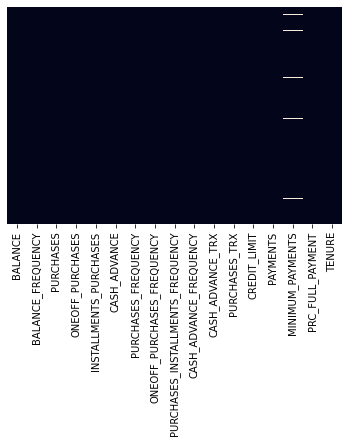

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

### 3. Prepare the data

##### A- Data Cleaning

In [13]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
median = data["MINIMUM_PAYMENTS"].median() # option 3
data["MINIMUM_PAYMENTS"].fillna(median, inplace=True)

In [15]:
median = data["CREDIT_LIMIT"].median() # option 3
data["CREDIT_LIMIT"].fillna(median, inplace=True)

In [16]:
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

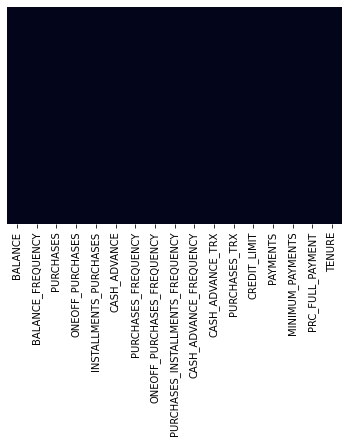

In [17]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [56]:
X = data[["BALANCE", "CREDIT_LIMIT"]]
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X)

In [57]:
df_scaled

array([[-0.73198937, -0.9603784 ],
       [ 0.78696085,  0.68867844],
       [ 0.44713513,  0.82609984],
       ...,
       [-0.7403981 , -0.9603784 ],
       [-0.74517423, -1.0977998 ],
       [-0.57257511, -0.90540984]])

### CLustering 

In [61]:

model = KMeans(n_clusters=2)

model.fit(df_scaled)

predict = model.predict(df_scaled)


In [62]:
labels = model.labels_
centers = model.cluster_centers_
centers_transformed = scaler.inverse_transform(centers)
print(scaler.inverse_transform(centers))


[[ 831.4048885  3220.27785132]
 [4604.24902632 9777.11589733]]


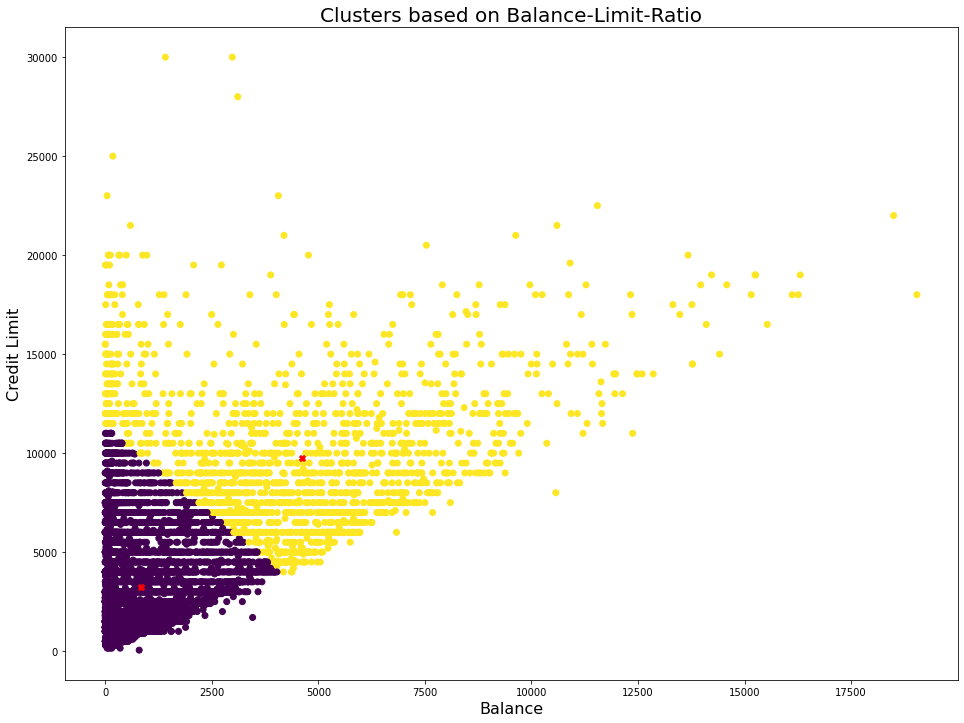

In [63]:
plt.figure(figsize = (16, 12))
plt.title("Clusters based on Balance-Limit-Ratio", fontsize = 20)
plt.scatter(data["BALANCE"], data["CREDIT_LIMIT"], c = labels)
plt.scatter(centers_transformed[:, 0], centers_transformed[:, 1], c = "red", marker = "X")
plt.xlabel("Balance", fontsize = 16)
plt.ylabel("Credit Limit", fontsize = 16)
plt.show()

In [64]:
X = data[["BALANCE", "CASH_ADVANCE"]]
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X)

In [68]:

model = KMeans(n_clusters=2)

model.fit(df_scaled)

predict = model.predict(df_scaled)


In [69]:
labels = model.labels_
centers = model.cluster_centers_
centers_transformed = scaler.inverse_transform(centers)
print(scaler.inverse_transform(centers))


[[5403.39796232 4329.6083378 ]
 [ 929.07030832  424.26933966]]


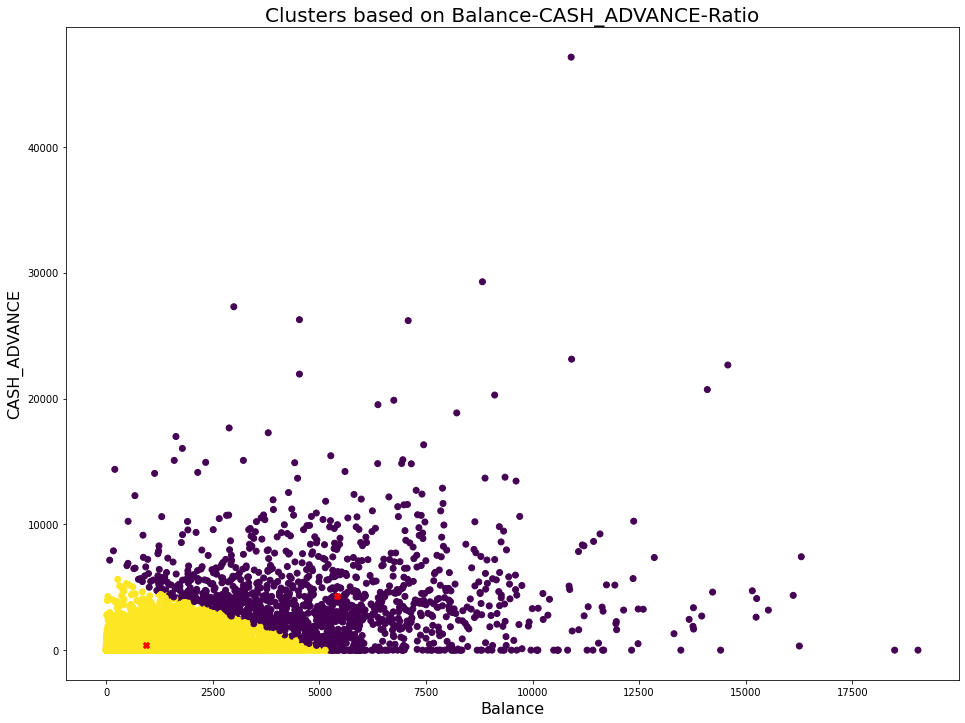

In [70]:
plt.figure(figsize = (16, 12))
plt.title("Clusters based on Balance-CASH_ADVANCE-Ratio", fontsize = 20)
plt.scatter(data["BALANCE"], data["CASH_ADVANCE"], c = labels)
plt.scatter(centers_transformed[:, 0], centers_transformed[:, 1], c = "red", marker = "X")
plt.xlabel("Balance", fontsize = 16)
plt.ylabel("CASH_ADVANCE", fontsize = 16)
plt.show()